In [3]:
import os
import pickle
import gzip
import argparse
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import LabelBinarizer

from neural_net import NeuralNet
from manifold import MDS, ISOMAP
import utils



In [14]:
def load_dataset(filename):
    with open(os.path.join('..','data',filename), 'rb') as f:
        return pickle.load(f)

## Q1.1

In [15]:
dataset = load_dataset('animals.pkl')
X = dataset['X'].astype(float)
animals = dataset['animals']
n,d = X.shape

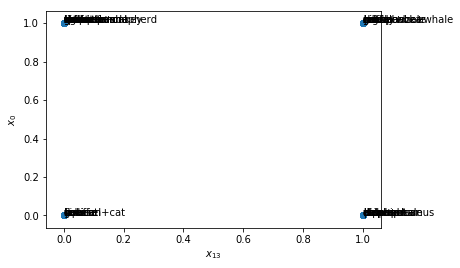

In [16]:
f1, f2 = np.random.choice(d, size=2, replace=False)

plt.figure()
plt.scatter(X[:,f1], X[:,f2])
plt.xlabel("$x_{%d}$" % f1)
plt.ylabel("$x_{%d}$" % f2)
for i in range(n):
    plt.annotate(animals[i], (X[i,f1], X[i,f2]))


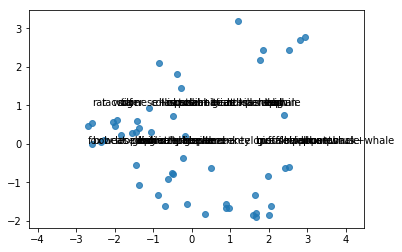

In [17]:
#Run PCA on ths data set
pca1 = PCA(n_components=2)
pca1.fit(X)
reducedDim = pca1.transform(X)
plt.scatter(reducedDim[:, 0], reducedDim[:, 1], alpha=0.8)
for i in range(n):
    plt.annotate(animals[i], (reducedDim[i,0], X[i,1]))
plt.axis('equal');

In [18]:
#How much variance is explianed by first two components
print("How much variance explained by component 1: " +
      str(pca1.explained_variance_ratio_[0])+ "\n"+
      "How much variance explained by component 2: "+
      str(pca1.explained_variance_ratio_[1]))

print("Total variance explained by first two component: " 
      + str(sum(pca1.explained_variance_ratio_)))

How much variance explained by component 1: 0.19019080770748145
How much variance explained by component 2: 0.1329410041062869
Total variance explained by first two component: 0.3231318118137684


In [19]:
#how many components to explain 50% of variance
pca2 = PCA(n_components=5)
pca2.fit(X)
print(sum(pca2.explained_variance_ratio_))
# need at least 5 components

0.544659268022837


## MDS

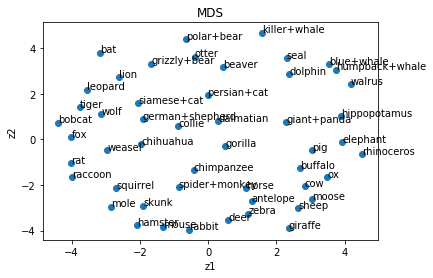

In [20]:
 dataset = load_dataset('animals.pkl')
X = dataset['X'].astype(float)
animals = dataset['animals']
n,d = X.shape

model = MDS(n_components=2)
Z = model.compress(X)

fig, ax = plt.subplots()
ax.scatter(Z[:,0], Z[:,1])
plt.ylabel('z2')
plt.xlabel('z1')
plt.title('MDS')
for i in range(n):
    ax.annotate(animals[i], (Z[i,0], Z[i,1]))


In [21]:
#Getting object function value
#get MDS objective function value

function_val = 0
for i in range (0,n):
    for j in range(i+1,n):
        function_val = function_val +0.5*(np.linalg.norm(Z[i] - Z[j])- np.linalg.norm(X[i]-X[j]))**2
        
print(function_val)

1776.8183112784673


In [ ]:
#get PCA objective function value

for i in range(0,n):
        pca_val = pca_val + ( - X[i,j])


In [94]:
#get PCA objective function value
back = pca1.inverse_transform(reducedDim)
pca_val = 0
for i in range (0,n):
    pca_val = pca_val + sum((back[i] - X[i])**2)
    
print(pca_val)

497.1461468590234


In [22]:
#ISOMAP
n = X.shape[0]

# Compute Euclidean distances
D = utils.euclidean_dist_squared(X,X)
D = np.sqrt(D)

# TODO: Convert these Euclidean distances into geodesic distances
#find the nearest neighbours
#need to make an adjacency matrix

In [23]:
#practise
#get row, find nearest 2 points. Add 1 to them. Zero elsewhere
dist_mat = D
#first smallest value will always be zero. so need one more 
min_indicies = dist_mat.argsort(axis=1)

#create empty adjaceny matrix
D = np.zeros([50,50])
#np.insert(D,min_indicies[1])
D[1][min_indicies[1][1:3]] = 1
D[1]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [24]:
#get indicies of nearest points
dist_mat = D
min_indicies = dist_mat.argsort(axis=1)
#create empty adjaceny matrix
D = np.zeros([50,50])

for i in range(0,n):
    #get nearest two points 
    min_idx = min_indicies[i][1:3]
    #add 1 to adj matrix for nearest two points
    D[i][min_idx] = 1


In [216]:
#run dijkstras on D
D =utils.dijkstra(D)
D[np.isinf(D)] = D[~np.isinf(D)].max()

array([[ 0., 10., 10., ..., 10.,  3., 10.],
       [10.,  0., 10., ...,  5., 10., 10.],
       [10., 10.,  0., ..., 10., 10.,  1.],
       ...,
       [10.,  5., 10., ...,  0., 10., 10.],
       [ 3., 10., 10., ..., 10.,  0., 10.],
       [10., 10.,  1., ..., 10., 10.,  0.]])

Figure saved as '../figs/t-SNE_animals.png'


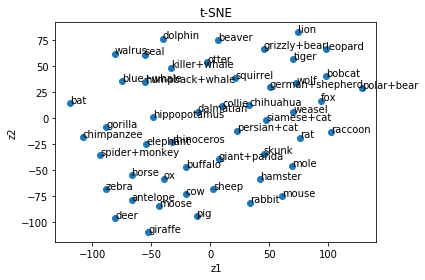

In [25]:
#t-SNE
Xtsne = TSNE(n_components=2, perplexity=30, angle=0.2).fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(Xtsne[:,0], Xtsne[:,1])
plt.ylabel('z2')
plt.xlabel('z1')
plt.title('t-SNE')
for i in range(n):
    ax.annotate(animals[i], (Xtsne[i,0], Xtsne[i,1]))
utils.savefig('t-SNE_animals.png')

In [26]:
#Neural network quick example
W = np.array([[-2,2,-1],[1,-2,0]])
v = np.array([3,1])
x1 = np.array([-3,-2,2])

In [27]:
# z_i = W*x_i
z1 = W@x1
print(z1)

[0 1]


In [28]:
#h(z_i), h = sigmoid function
h1 = 1/(1+np.exp(-z1))
print(h1)

[0.5        0.73105858]


In [274]:
#y1 = v^T * h
y1 = np.transpose(v)*h1
print(y1)

[1.5        0.73105858]


In [4]:
with gzip.open(os.path.join('..', 'data', 'mnist.pkl.gz'), 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f, encoding="latin1")
X, y = train_set
Xtest, ytest = test_set

In [276]:
#suffle data
np.random.shuffle(X)
np.random.shuffle(y)

In [12]:
X.shape[0]

50000

In [6]:
binarizer = LabelBinarizer()
Y = binarizer.fit_transform(y)

In [7]:
Y.shape

(50000, 10)

In [11]:
n_epoch = 10
for epoch in 1-n_epoch:
    print(epoch)

TypeError: 'int' object is not iterable